<a href="https://colab.research.google.com/github/GasparQC/Proyectos/blob/main/TitanicRandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AprendizajeAutomatico/Titanic/Copia de Titanic-Dataset.csv')
dfe = pd.read_csv('/content/drive/MyDrive/AprendizajeAutomatico/Titanic/Copia de Titanic-Dataset-Extendido.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Imputación de valores faltantes en la columna 'Age' usando la mediana por grupos de 'Pclass' y 'Sex'
df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))
df['Age']

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,21.5
889,26.0


In [ ]:
# Rellenar los valores faltantes en 'Embarked' con 'S'
df['Embarked'] = df['Embarked'].fillna('S')


In [ ]:
# Filtrar para obtener la mediana de la tarifa para un pasajero de tercera clase, hombre, sin familiares
median_fare = df[(df['Pclass'] == 3) & (df['Sex'] == 'male') & (df['SibSp'] == 0) & (df['Parch'] == 0)]['Fare'].median()


# Llenar el valor faltante en 'Fare' usando esta mediana
df['Fare'] = df['Fare'].fillna(median_fare)

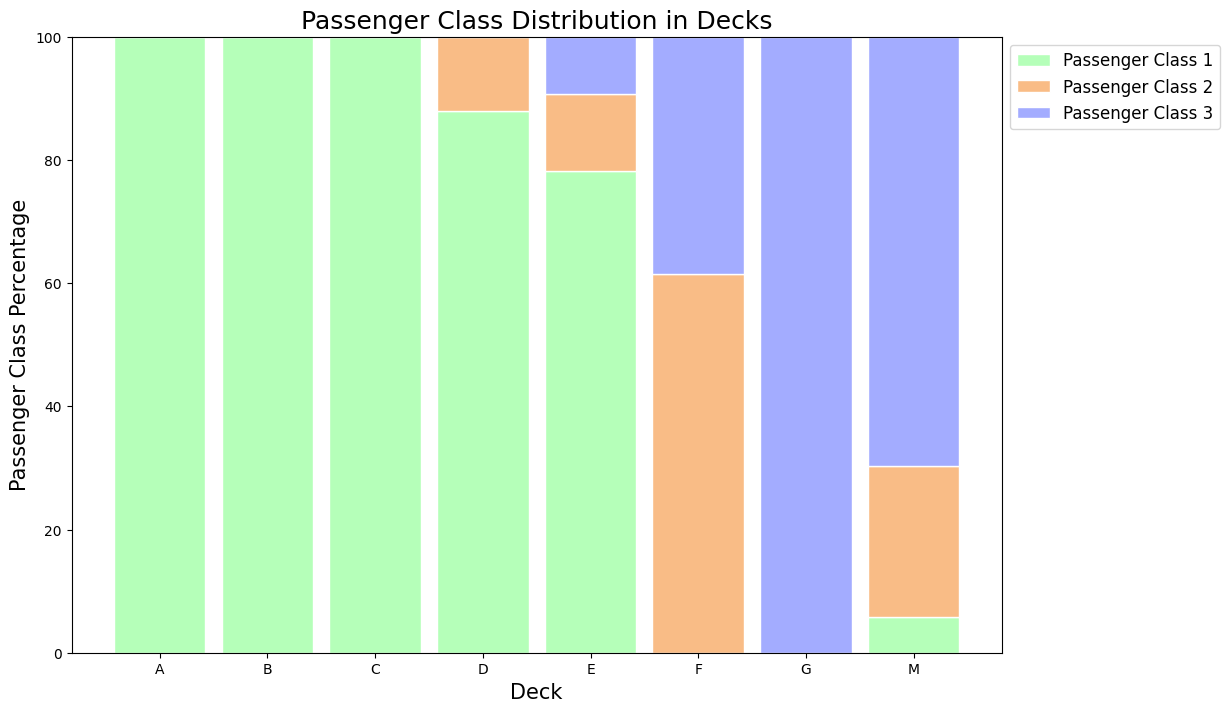

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Crear la columna 'Deck' a partir de la primera letra de 'Cabin' (con 'M' para los valores faltantes)
df['Deck'] = df['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
# Reemplazar 'T' por 'A' en la columna 'Deck'
df['Deck'] = df['Deck'].replace('T', 'A')
# Agrupar por 'Deck' y 'Pclass' y contar cada combinación
deck_class_counts = df.groupby(['Deck', 'Pclass']).size().unstack(fill_value=0)

# Calcular los porcentajes dentro de cada 'Deck'
deck_class_percentages = deck_class_counts.apply(lambda x: 100 * x / x.sum(), axis=1)

# Crear el gráfico de barras apiladas
deck_names = deck_class_percentages.index
bar_count = np.arange(len(deck_names))
bar_width = 0.85

# Dividir las clases de pasajeros para el gráfico
pclass1 = deck_class_percentages[1]
pclass2 = deck_class_percentages[2]
pclass3 = deck_class_percentages[3]

plt.figure(figsize=(12, 8))
plt.bar(bar_count, pclass1, color='#b5ffb9', edgecolor='white', width=bar_width, label='Passenger Class 1')
plt.bar(bar_count, pclass2, bottom=pclass1, color='#f9bc86', edgecolor='white', width=bar_width, label='Passenger Class 2')
plt.bar(bar_count, pclass3, bottom=pclass1 + pclass2, color='#a3acff', edgecolor='white', width=bar_width, label='Passenger Class 3')

plt.xlabel('Deck', size=15)
plt.ylabel('Passenger Class Percentage', size=15)
plt.xticks(bar_count, deck_names)
plt.title('Passenger Class Distribution in Decks', size=18)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 12})
plt.show()


100% of A, B and C decks are 1st class passengers
Deck D has 87% 1st class and 13% 2nd class passengers
Deck E has 83% 1st class, 10% 2nd class and 7% 3rd class passengers
Deck F has 62% 2nd class and 38% 3rd class passengers
100% of G deck are 3rd class passengers
There is one person on the boat deck in T cabin and he is a 1st class passenger. T cabin passenger has the closest resemblance to A deck passengers so he is grouped with A deck
Passengers labeled as M are the missing values in Cabin feature. I don't think it is possible to find those passengers' real Deck so I decided to use M like a deck

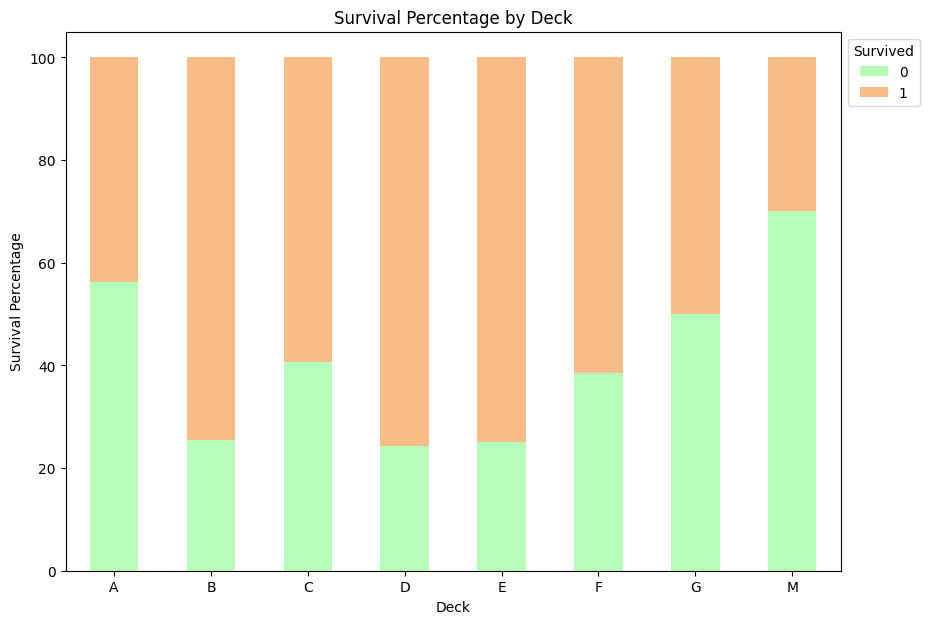

In [ ]:
# Agrupar por Deck y Survived, y contar
surv_counts = df.groupby(['Deck', 'Survived']).size().unstack(fill_value=0)

# Convertir los conteos a porcentajes
surv_percentages = surv_counts.div(surv_counts.sum(axis=1), axis=0) * 100

# Graficar
surv_percentages.plot(kind='bar', stacked=True, figsize=(10, 7), color=['#b5ffb9', '#f9bc86'])
plt.xlabel('Deck')
plt.ylabel('Survival Percentage')
plt.title('Survival Percentage by Deck')
plt.legend(title='Survived', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)
plt.show()

In [ ]:
df['Deck'] = df['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
df['Deck'] = df['Deck'].replace(['A', 'B', 'C'], 'ABC')
df['Deck'] = df['Deck'].replace(['D', 'E'], 'DE')
df['Deck'] = df['Deck'].replace(['F', 'G'], 'FG')

In [ ]:
df['Deck'].value_counts()

,count
Deck,
M,687
ABC,121
DE,65
FG,17
T,1


<ipython-input-82-690080811e6c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='viridis')


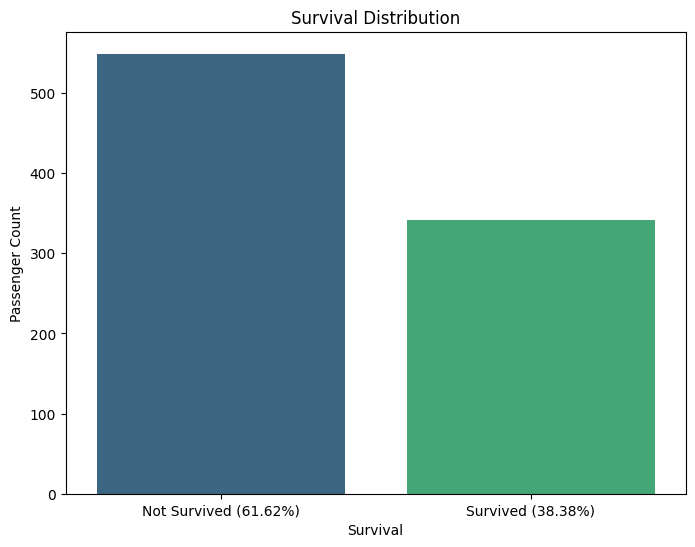

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Conteo de supervivientes y no supervivientes
survived_count = df['Survived'].value_counts()
survived_per = survived_count[1] / df.shape[0] * 100
not_survived_per = survived_count[0] / df.shape[0] * 100

# Gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=df, palette='viridis')
plt.xticks([0, 1], [f'Not Survived ({not_survived_per:.2f}%)', f'Survived ({survived_per:.2f}%)'])
plt.xlabel('Survival')
plt.ylabel('Passenger Count')
plt.title('Survival Distribution')
plt.show()

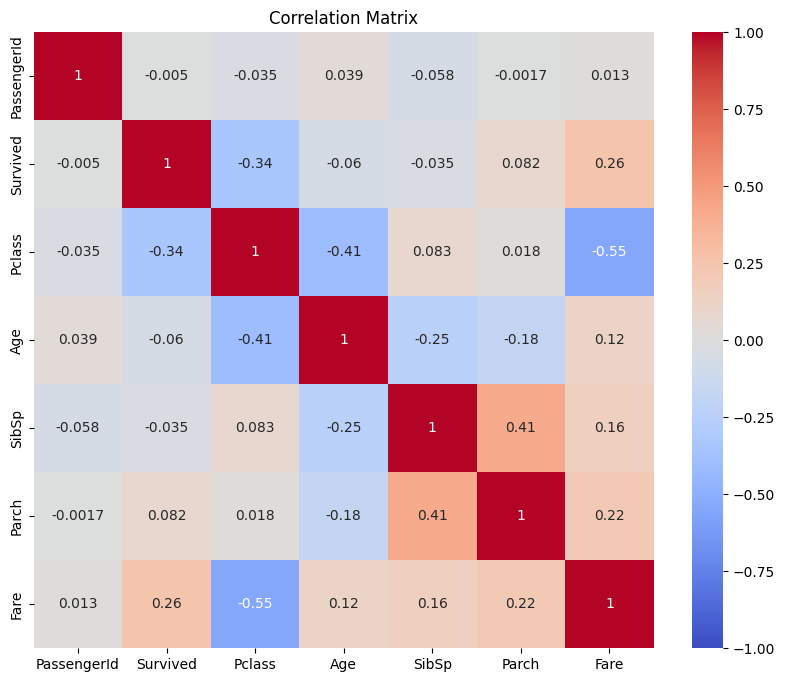

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas para calcular la matriz de correlación
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Crear la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# prompt: matriz de correlacion pero como tabla, no como grafico

# Seleccionar solo las columnas numéricas para calcular la matriz de correlación
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Mostrar la matriz de correlación como tabla
correlation_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.039033,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.059579,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.413583,0.083081,0.018443,-0.549500
Age,0.039033,-0.059579,-0.413583,1.000000,-0.249854,-0.175526,0.122692
SibSp,-0.057527,-0.035322,0.083081,-0.249854,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.175526,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.122692,0.159651,0.216225,1.000000


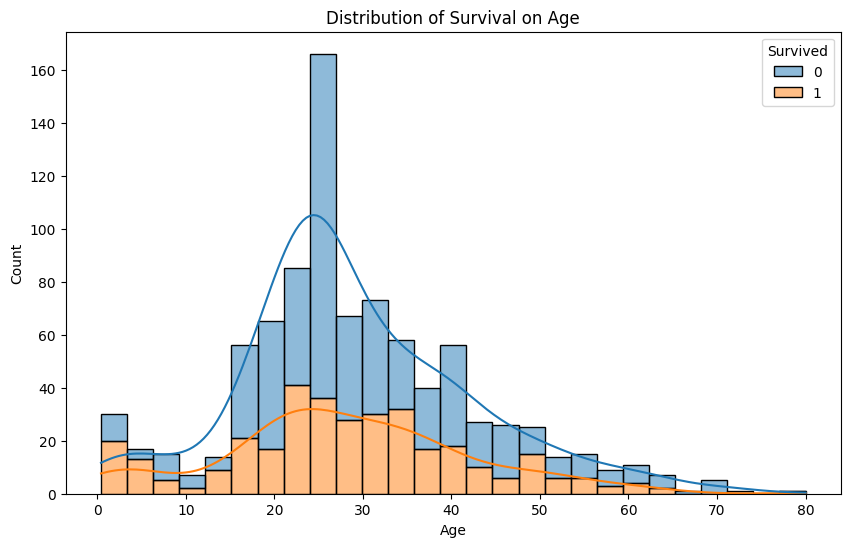

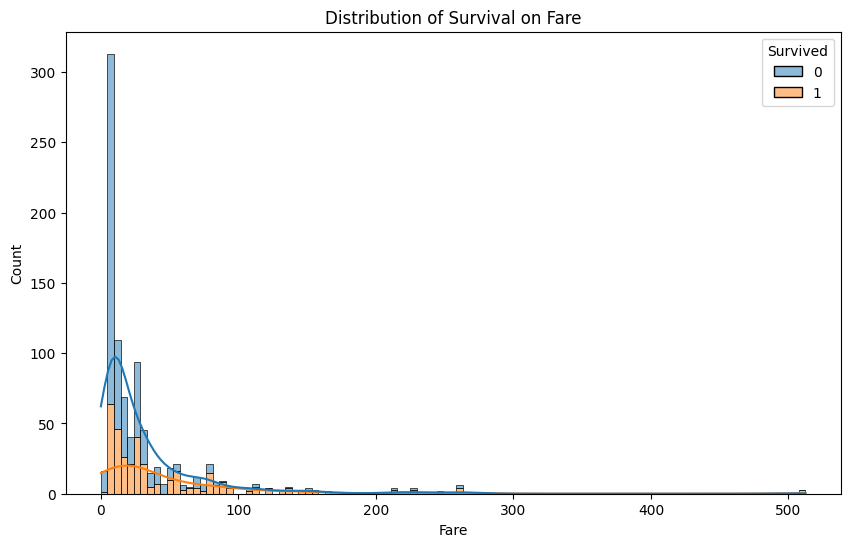

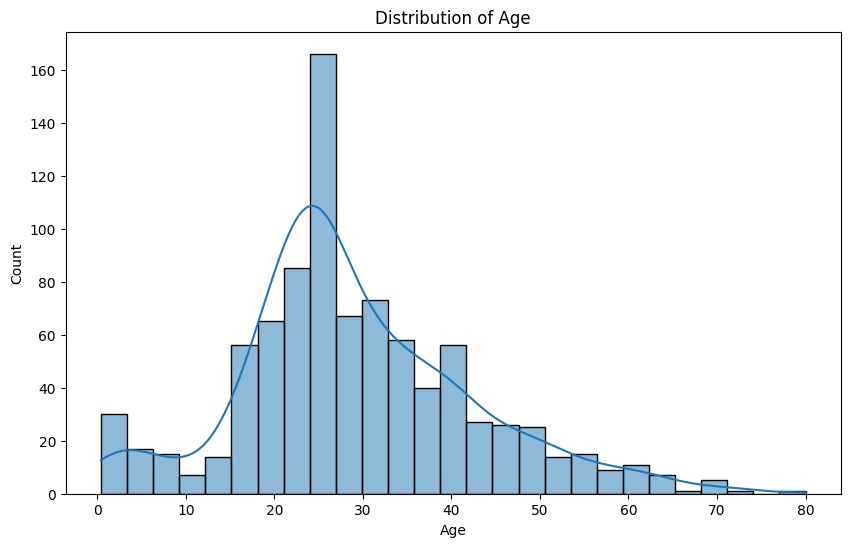

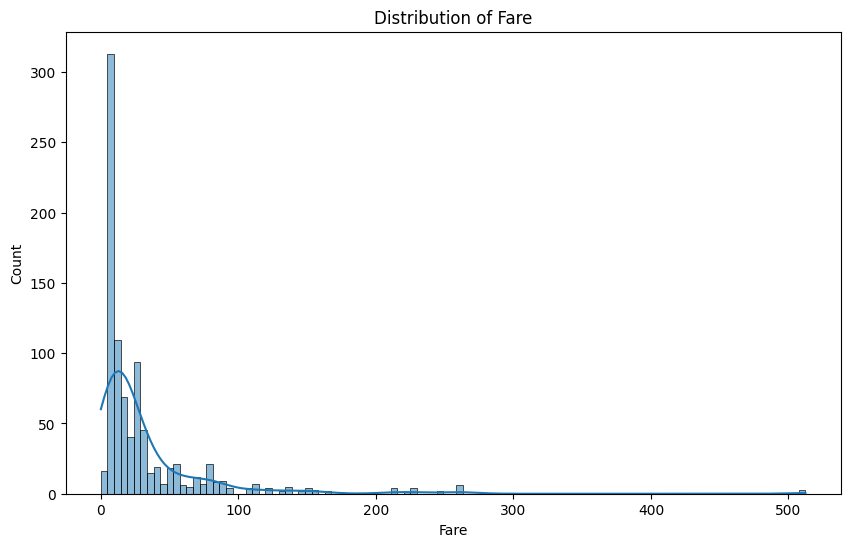

In [ ]:
# Distribución de supervivencia en función de la edad
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', kde=True)
plt.title('Distribution of Survival on Age')
plt.show()

# Distribución de supervivencia en función de la tarifa
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Fare', hue='Survived', multiple='stack', kde=True)
plt.title('Distribution of Survival on Fare')
plt.show()

# Distribución de la variable edad
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), kde=True)
plt.title('Distribution of Age')
plt.show()

# Distribución de la variable tarifa
plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'].dropna(), kde=True)
plt.title('Distribution of Fare')
plt.show()


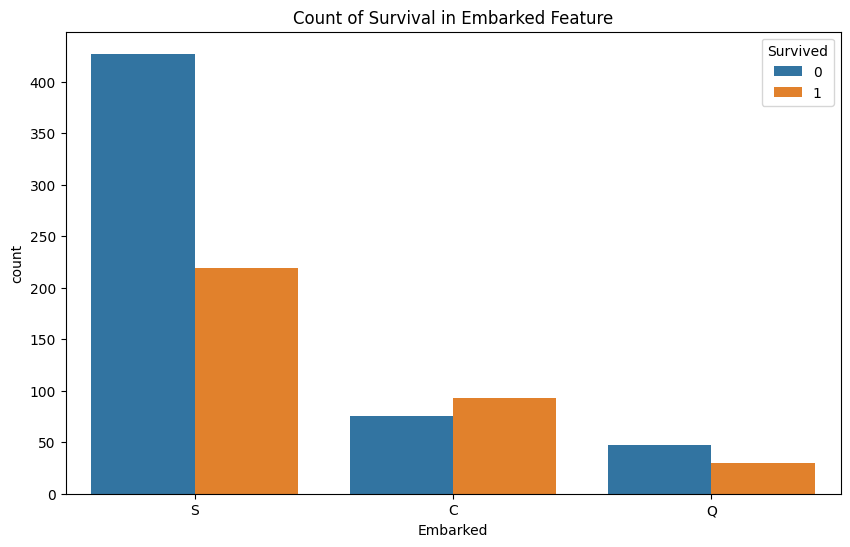

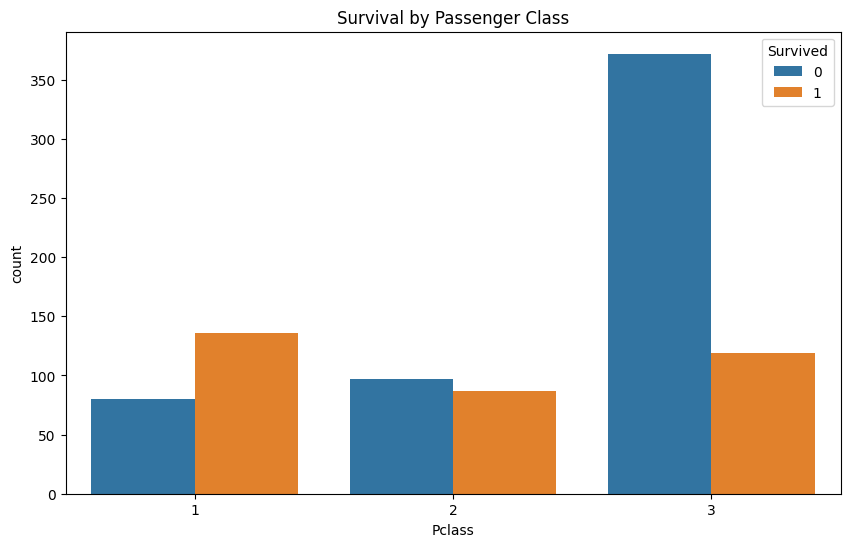

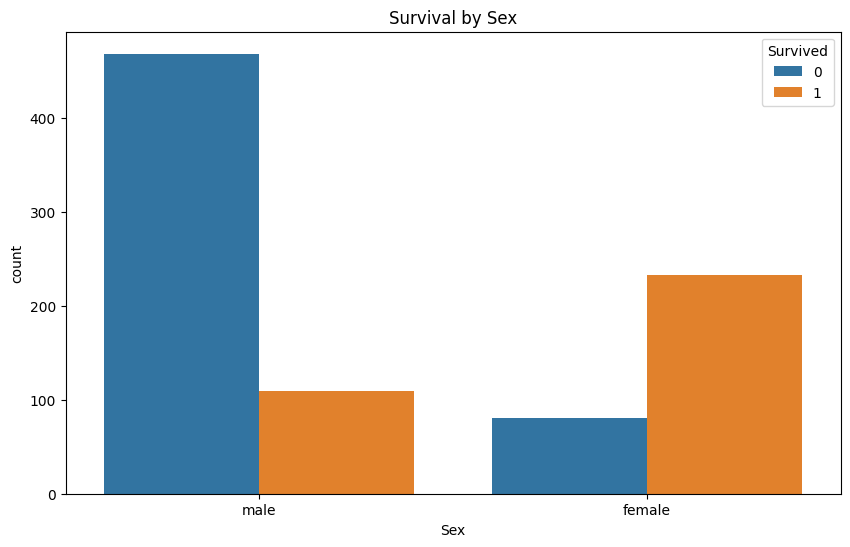

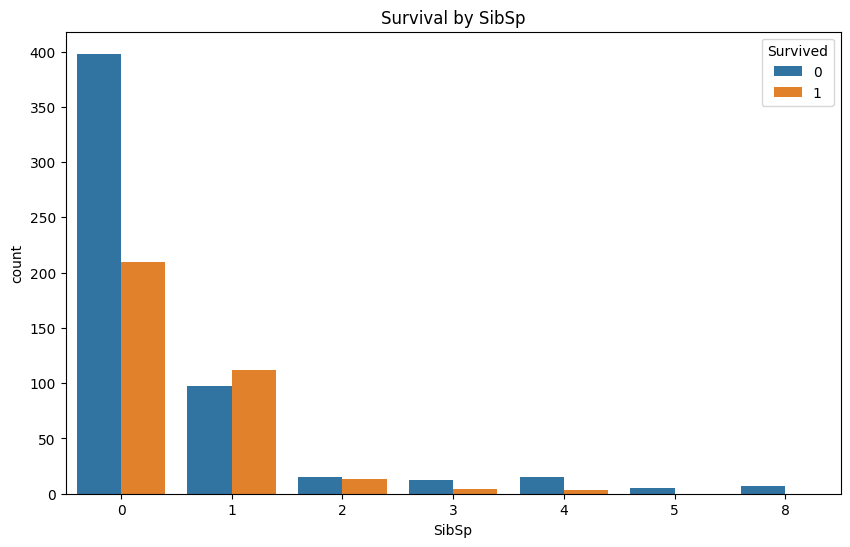

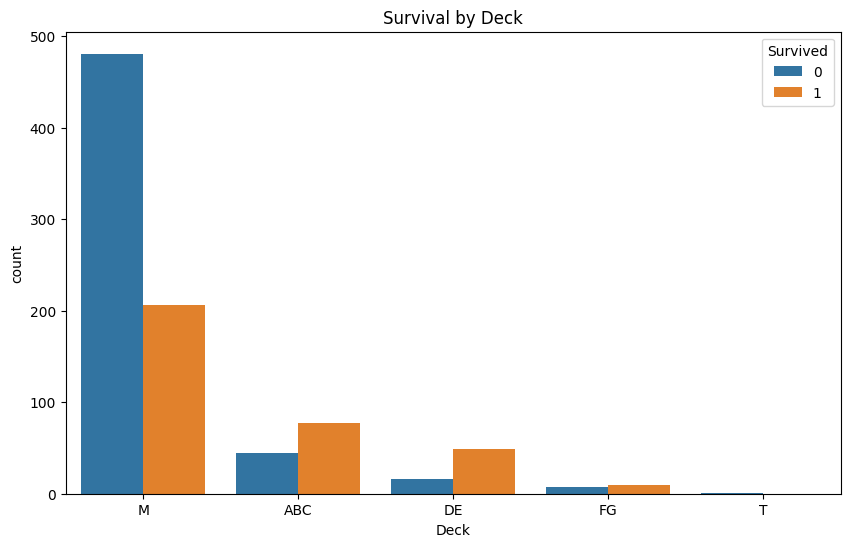

In [ ]:
# Conteo de supervivencia en función de Embarked
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Embarked', hue='Survived')
plt.title('Count of Survival in Embarked Feature')
plt.show()

# Conteo de supervivencia en función de Pclass
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival by Passenger Class')
plt.show()

# Conteo de supervivencia en función de Sex
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival by Sex')
plt.show()

# Conteo de supervivencia en función de SibSp
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='SibSp', hue='Survived')
plt.title('Survival by SibSp')
plt.show()

# Conteo de supervivencia en función de Deck (si existe)
if 'Deck' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='Deck', hue='Survived')
    plt.title('Survival by Deck')
    plt.show()


In [ ]:
# Crear columna 'Family_Size' sumando SibSp y Parch
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1  # +1 para incluir al pasajero

# Clasificar los tamaños de familia
df['Family_Size_Category'] = pd.cut(
    df['Family_Size'],
    bins=[0, 1, 4, 6, 11],
    labels=['Alone', 'Small', 'Medium', 'Large']
)

# Verificar el resultado
df[['SibSp', 'Parch', 'Family_Size', 'Family_Size_Category']].head()


,SibSp,Parch,Family_Size,Family_Size_Category
0,1,0,2,Small
1,1,0,2,Small
2,0,0,1,Alone
3,1,0,2,Small
4,0,0,1,Alone


In [ ]:
# Extraer el título del nombre de cada pasajero
df['Title'] = df['Name'].str.extract(r',\s*([^\.]*)\.')[0]

# Agrupar los títulos en categorías específicas
df['Title'] = df['Title'].replace({
    'Miss': 'Miss/Mrs/Ms', 'Mrs': 'Miss/Mrs/Ms', 'Ms': 'Miss/Mrs/Ms', 'Mlle': 'Miss/Mrs/Ms',
    'Lady': 'Miss/Mrs/Ms', 'Mme': 'Miss/Mrs/Ms', 'the Countess': 'Miss/Mrs/Ms', 'Dona': 'Miss/Mrs/Ms',
    'Dr': 'Dr/Military/Noble/Clergy', 'Col': 'Dr/Military/Noble/Clergy', 'Major': 'Dr/Military/Noble/Clergy',
    'Jonkheer': 'Dr/Military/Noble/Clergy', 'Capt': 'Dr/Military/Noble/Clergy', 'Sir': 'Dr/Military/Noble/Clergy',
    'Don': 'Dr/Military/Noble/Clergy', 'Rev': 'Dr/Military/Noble/Clergy',
    'Master': 'Master'  # Master se mantiene sin cambios
})

# Crear la columna binaria 'Is_Married' basada en el título 'Mrs'
df['Is_Married'] = df['Title'].apply(lambda x: 1 if x == 'Miss/Mrs/Ms' and 'Mrs' in x else 0)

# Verificar el resultado
df[['Name', 'Title', 'Is_Married']].head()


,Name,Title,Is_Married
0,"Braund, Mr. Owen Harris",Mr,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Miss/Mrs/Ms,1
2,"Heikkinen, Miss. Laina",Miss/Mrs/Ms,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Miss/Mrs/Ms,1
4,"Allen, Mr. William Henry",Mr,0


In [ ]:
def extract_surname(name):
    return name.split(",")[0].strip()

df['Family'] = df['Name'].apply(extract_surname)


In [ ]:
# Paso 2: Calcular Family_Survival_Rate y Family_Survival_Rate_NA en todo el conjunto de datos
family_survival_rate = df.groupby('Family')['Survived'].mean()
df['Family_Survival_Rate'] = df['Family'].map(family_survival_rate)
df['Family_Survival_Rate_NA'] = df['Family_Survival_Rate'].isnull().astype(int)
df['Family_Survival_Rate'].fillna(0.5, inplace=True)  # Imputación para familias sin datos previos

<ipython-input-90-65a5d3fa3c8c>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Family_Survival_Rate'].fillna(0.5, inplace=True)  # Imputación para familias sin datos previos


In [ ]:
# Paso 3: Calcular Ticket_Survival_Rate y Ticket_Survival_Rate_NA en todo el conjunto de datos
ticket_survival_rate = df.groupby('Ticket')['Survived'].mean()
df['Ticket_Survival_Rate'] = df['Ticket'].map(ticket_survival_rate)
df['Ticket_Survival_Rate_NA'] = df['Ticket_Survival_Rate'].isnull().astype(int)
df['Ticket_Survival_Rate'].fillna(0.5, inplace=True)  # Imputación para tickets sin datos previos

<ipython-input-91-30594d1ac452>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Ticket_Survival_Rate'].fillna(0.5, inplace=True)  # Imputación para tickets sin datos previos


In [ ]:
# Calcular Survival_Rate y Survival_Rate_NA
df['Survival_Rate'] = df[['Family_Survival_Rate', 'Ticket_Survival_Rate']].mean(axis=1)
df['Survival_Rate_NA'] = df[['Family_Survival_Rate_NA', 'Ticket_Survival_Rate_NA']].mean(axis=1)


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Codificar Embarked, Sex, Deck, Title y Family_Size_Grouped con LabelEncoder
label_enc = LabelEncoder()
for col in ['Embarked', 'Sex', 'Deck', 'Title', 'Family_Size_Category']:
    df[col] = label_enc.fit_transform(df[col])

# One-Hot Encoding para las características categóricas
df = pd.get_dummies(df, columns=['Pclass', 'Sex', 'Deck', 'Embarked', 'Title'])


In [ ]:
# Crear bins para Age y Fare
df['Age_Binned'] = pd.cut(df['Age'], bins=[0, 12, 18, 30, 45, 60, 80], labels=False)
df['Fare_Binned'] = pd.cut(df['Fare'], bins=[0, 7.91, 14.45, 31, 100, 600], labels=False)


In [ ]:
# Calcular la frecuencia de cada ticket
df['Ticket_Frequency'] = df.groupby('Ticket')['Ticket'].transform('count')


In [ ]:
# Seleccionar solo las columnas numéricas para calcular la matriz de correlación
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Mostrar la matriz de correlación como tabla
correlation_matrix

,PassengerId,Survived,Age,SibSp,Parch,Fare,Family_Size,Family_Size_Category,Is_Married,Family_Survival_Rate,Family_Survival_Rate_NA,Ticket_Survival_Rate,Ticket_Survival_Rate_NA,Survival_Rate,Survival_Rate_NA,Age_Binned,Fare_Binned,Ticket_Frequency
PassengerId,1.000000,-0.005007,0.039033,-0.057527,-0.001652,0.012658,-0.040143,-0.046476,-0.046179,0.013326,NaN,-0.002272,NaN,0.005524,NaN,0.041356,-0.013760,0.003355
Survived,-0.005007,1.000000,-0.059579,-0.035322,0.081629,0.257307,0.016639,0.246084,0.540769,0.908700,NaN,0.927549,NaN,0.931213,NaN,-0.055256,0.298537,0.038247
Age,0.039033,-0.059579,1.000000,-0.249854,-0.175526,0.122692,-0.258456,-0.128544,-0.106297,-0.016084,NaN,-0.015992,NaN,-0.016265,NaN,0.956871,0.135726,-0.221099
SibSp,-0.057527,-0.035322,-0.249854,1.000000,0.414838,0.159651,0.890712,0.402984,0.115830,-0.042264,NaN,-0.037705,NaN,-0.040527,NaN,-0.273700,0.363343,0.661622
Parch,-0.001652,0.081629,-0.175526,0.414838,1.000000,0.216225,0.783111,0.445335,0.246782,0.078972,NaN,0.091351,NaN,0.086431,NaN,-0.221919,0.387189,0.593076
Fare,0.012658,0.257307,0.122692,0.159651,0.216225,1.000000,0.217138,0.254738,0.182763,0.268295,NaN,0.277405,NaN,0.276757,NaN,0.113932,0.679521,0.345541
Family_Size,-0.040143,0.016639,-0.258456,0.890712,0.783111,0.217138,1.000000,0.497908,0.202454,0.010567,NaN,0.019867,NaN,0.015481,NaN,-0.297932,0.442107,0.748487
Family_Size_Category,-0.046476,0.246084,-0.128544,0.402984,0.445335,0.254738,0.497908,1.000000,0.295750,0.258117,NaN,0.275115,NaN,0.270476,NaN,-0.151058,0.503642,0.296174
Is_Married,-0.046179,0.540769,-0.106297,0.115830,0.246782,0.182763,0.202454,0.295750,1.000000,0.466975,NaN,0.467041,NaN,0.473616,NaN,-0.099610,0.245817,0.156223
Family_Survival_Rate,0.013326,0.908700,-0.016084,-0.042264,0.078972,0.268295,0.010567,0.258117,0.466975,1.000000,NaN,0.944579,NaN,0.985758,NaN,-0.016097,0.321151,0.049713


In [ ]:
# prompt: mutual information

from sklearn.feature_selection import mutual_info_classif

# Seleccionar las características que deseas usar para calcular la información mutua
features = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_0', 'Sex_1', 'Age', 'Fare',
            'SibSp', 'Parch', 'Embarked_0', 'Embarked_1', 'Embarked_2', 'Family_Size',
            'Ticket_Survival_Rate', 'Family_Survival_Rate', 'Survival_Rate']

# Calcular la información mutua entre cada característica y la variable objetivo 'Survived'
mutual_info = mutual_info_classif(df[features], df['Survived'])

# Crear un DataFrame para visualizar la información mutua
mutual_info_df = pd.DataFrame({'feature': features, 'mutual_info': mutual_info})

# Ordenar el DataFrame por información mutua en orden descendente
mutual_info_df = mutual_info_df.sort_values('mutual_info', ascending=False)

mutual_info_df

,feature,mutual_info
15,Survival_Rate,0.581091
13,Ticket_Survival_Rate,0.576451
14,Family_Survival_Rate,0.542586
4,Sex_1,0.199286
3,Sex_0,0.137050
6,Fare,0.134399
2,Pclass_3,0.058291
9,Embarked_0,0.036124
5,Age,0.031511
12,Family_Size,0.029385


In [ ]:
# Suponiendo que df es tu dataframe ya cargado

# Crear interacciones con Survival_Rate y variables con alta mutual information o correlación
df['Survival_Rate_Married'] = df['Survival_Rate'] * df['Is_Married']
df['Survival_Rate_Fare'] = df['Survival_Rate'] * df['Fare_Binned']

# Transformaciones en variables con correlaciones moderadas-alta (Family_Size, Ticket_Frequency, Fare)
df['Log_Family_Size'] = np.log1p(df['Family_Size'])  # Logaritmo de Family_Size para capturar escala
df['Log_Ticket_Frequency'] = np.log1p(df['Ticket_Frequency'])  # Logaritmo de frecuencia de ticket
df['Fare_Squared'] = df['Fare'] ** 2  # Cuadrado de Fare para capturar patrones no lineales

# Interacciones entre las variables categorizadas de Fare y Age
df['Fare_Age_Interaction'] = df['Fare_Binned'] * df['Age_Binned']

# Reducción de dimensionalidad para variables de menor mutual information y correlación (Ejemplo: Embarked, Pclass)
from sklearn.decomposition import PCA
low_mi_columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_0', 'Embarked_1', 'Embarked_2']
pca = PCA(n_components=1)  # Mantener una sola componente principal
df['PCA_Low_MI'] = pca.fit_transform(df[low_mi_columns])

# Eliminar columnas usadas para reducción de dimensionalidad
df.drop(columns=low_mi_columns, inplace=True)

# Verificación de las nuevas columnas de ingeniería de variables
print(df.head())

   PassengerId  Survived                                               Name  \
0            1         0                            Braund, Mr. Owen Harris   
1            2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3         1                             Heikkinen, Miss. Laina   
3            4         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5         0                           Allen, Mr. William Henry   

    Age  SibSp  Parch            Ticket     Fare Cabin  Family_Size  ...  \
0  22.0      1      0         A/5 21171   7.2500   NaN            2  ...   
1  38.0      1      0          PC 17599  71.2833   C85            2  ...   
2  26.0      0      0  STON/O2. 3101282   7.9250   NaN            1  ...   
3  35.0      1      0            113803  53.1000  C123            2  ...   
4  35.0      0      0            373450   8.0500   NaN            1  ...   

   Age_Binned  Fare_Binned Ticket_Frequency  Survival_Rate_Married  

In [ ]:
# prompt: drop all the unnecesary features after the above block and drop and the categorical

# Eliminar las columnas que no se utilizarán
columns_to_drop = ['PassengerId', 'Name', 'Cabin', 'Ticket', 'Age', 'Fare', 'Family', 'Family_Size', 'Ticket_Frequency', 'Family_Survival_Rate_NA', 'Ticket_Survival_Rate_NA']
df.drop(columns=columns_to_drop, inplace=True)

# Eliminar las características categóricas codificadas
# (Si necesitas alguna de ellas para análisis posteriores, asegúrate de no eliminarlas)
# df = df.select_dtypes(exclude=['uint8'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survived               891 non-null    int64  
 1   SibSp                  891 non-null    int64  
 2   Parch                  891 non-null    int64  
 3   Family_Size_Category   891 non-null    int64  
 4   Is_Married             891 non-null    int64  
 5   Family_Survival_Rate   891 non-null    float64
 6   Ticket_Survival_Rate   891 non-null    float64
 7   Survival_Rate          891 non-null    float64
 8   Survival_Rate_NA       891 non-null    float64
 9   Sex_0                  891 non-null    bool   
 10  Sex_1                  891 non-null    bool   
 11  Deck_0                 891 non-null    bool   
 12  Deck_1                 891 non-null    bool   
 13  Deck_2                 891 non-null    bool   
 14  Deck_3                 891 non-null    bool   
 15  Deck_4

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Separar las variables independientes (X) y dependientes (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Codificar variables categóricas en X
#X = pd.get_dummies(X, drop_first=True)

# Dividir el conjunto de datos en 70% entrenamiento y 30% prueba, con random_state=123
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Dividir el conjunto de validación dentro del conjunto de entrenamiento
X_val_train, X_val_test, y_val_train, y_val_test = train_test_split(X_train, y_train, test_size=0.3, random_state=123)

# Definir el modelo base
rf = RandomForestClassifier(random_state=123)

# Definir los parámetros para probar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Búsqueda de hiperparámetros con GridSearchCV en el conjunto de validación
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy', verbose=2)
grid_search.fit(X_val_train, y_val_train)

# Obtener los mejores parámetros y su rendimiento
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_
val_accuracy = grid_search.best_score_

print("Mejores hiperparámetros:", best_params)
print("Mejor precisión en validación:", val_accuracy)

# Evaluar el modelo con los mejores hiperparámetros en el conjunto de prueba
best_rf.fit(X_train, y_train)  # Entrenar en todo el conjunto de entrenamiento
y_pred = best_rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print("Precisión en conjunto de prueba:", test_accuracy)


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Mejores hiperparámetros: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Mejor precisión en validación: 0.9939759036144579
Precisión en conjunto de prueba: 0.9888059701492538


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer, QuantileTransformer, PowerTransformer

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer, QuantileTransformer, PowerTransformer
import pandas as pd

# Separar las variables independientes (X) y dependientes (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Dividir el conjunto de datos en 70% entrenamiento y 30% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Dividir el conjunto de entrenamiento en entrenamiento y validación
X_val_train, X_val_test, y_val_train, y_val_test = train_test_split(X_train, y_train, test_size=0.3, random_state=123)

# Escaladores a probar
scalers = [
    (StandardScaler(), 'StandardScaler'),
    (MinMaxScaler(), 'MinMaxScaler'),
    (RobustScaler(), 'RobustScaler'),
    (QuantileTransformer(output_distribution='normal'), 'QuantileTransformer'),
    (PowerTransformer(), 'PowerTransformer')
]

# Definir la grilla de hiperparámetros con técnicas para mitigar el overfitting
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 0.5],
    'bootstrap': [True, False],
    'ccp_alpha': [0.0, 0.01, 0.1]  # Valor para el Cost Complexity Pruning
}

best_scaler = None
best_rf_model = None
best_accuracy = 0
best_scaler_name = None

# Iterar sobre los escaladores para encontrar el mejor en validación
for scaler, scaler_name in scalers:
    # Escalar el conjunto de validación
    X_val_train_scaled = scaler.fit_transform(X_val_train)
    X_val_test_scaled = scaler.transform(X_val_test)

    # Definir y entrenar el modelo con GridSearchCV en el conjunto de validación
    rf = RandomForestClassifier(random_state=123)
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=1)
    grid_search.fit(X_val_train_scaled, y_val_train)

    # Obtener los mejores resultados en el conjunto de validación
    val_accuracy = grid_search.best_score_
    print(f"Validación - Precisión con {scaler_name}: {val_accuracy:.4f}")

    # Actualizar el mejor modelo si se mejora el desempeño
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_rf_model = grid_search.best_estimator_
        best_scaler = scaler
        best_scaler_name = scaler_name

print(f"\nMejor escalador: {best_scaler_name}")
print(f"Mejores hiperparámetros en validación: {grid_search.best_params_}")
print(f"Mejor precisión en validación: {best_accuracy:.4f}")

# Entrenar el mejor modelo con el conjunto de entrenamiento completo (train + validation)
X_train_scaled = best_scaler.fit_transform(X_train)
best_rf_model.fit(X_train_scaled, y_train)

# Evaluar en el conjunto de entrenamiento para verificar el ajuste del modelo
train_accuracy = accuracy_score(y_train, best_rf_model.predict(X_train_scaled))
print(f"\nPrecisión en entrenamiento (para verificar overfitting): {train_accuracy:.4f}")

# Escalar y evaluar en el conjunto de prueba
X_test_scaled = best_scaler.transform(X_test)
test_accuracy = accuracy_score(y_test, best_rf_model.predict(X_test_scaled))
print(f"\nPrecisión en prueba con el mejor modelo y escalador ({best_scaler_name}): {test_accuracy:.4f}")


NameError: name 'df' is not defined